In [2]:
!pip install drawsvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.9 MB/s eta 0:00:00


## **1. Importations et initialisation**

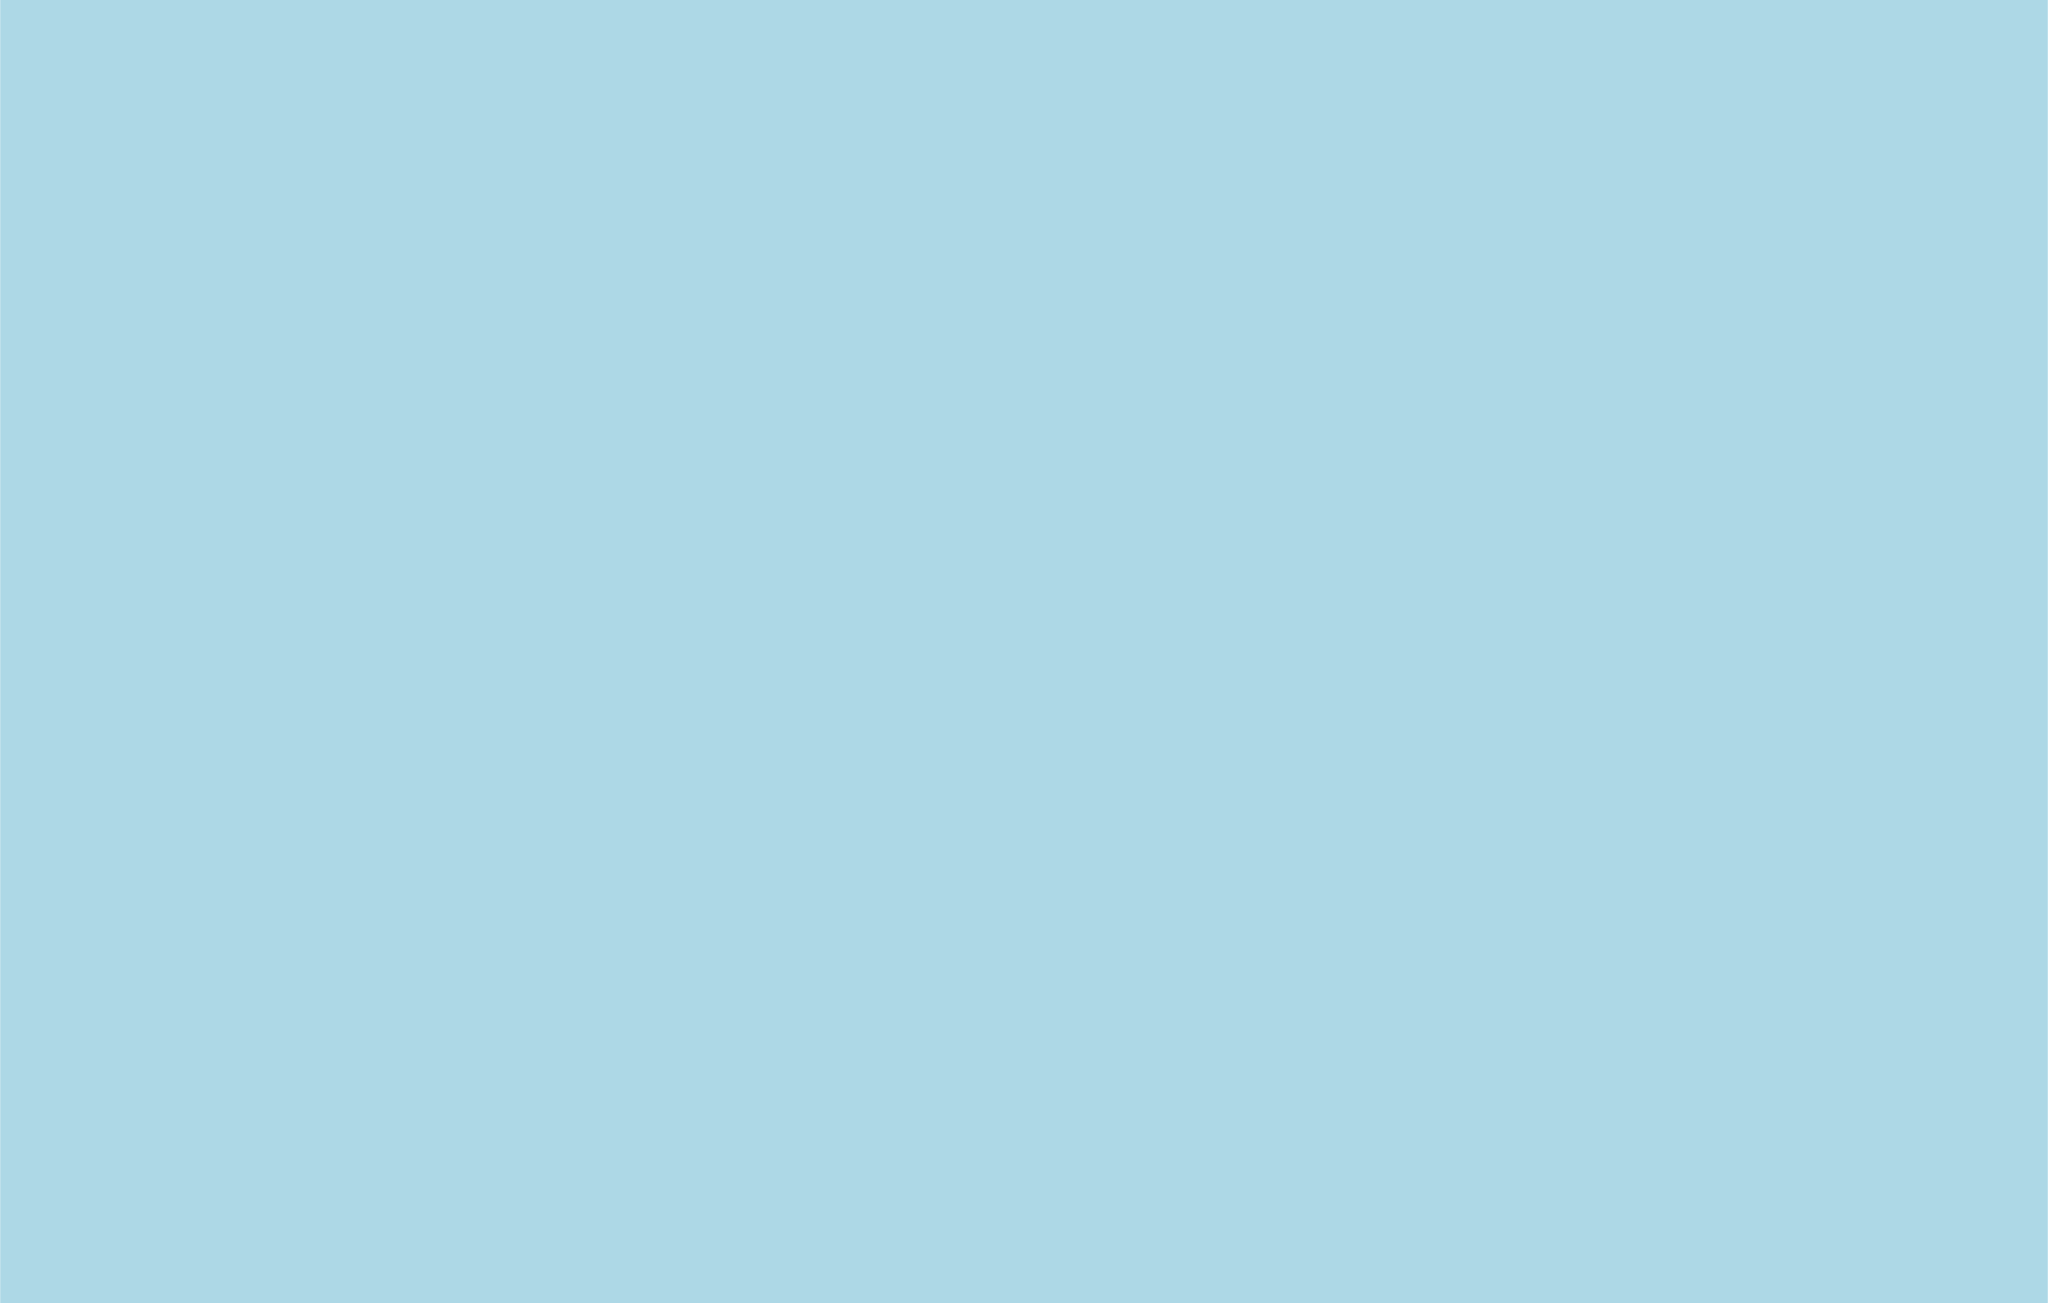

In [8]:
import drawsvg as draw
from math import cos, sin, pi
import random
from IPython.display import SVG

# Configuration des dimensions de l'image
WIDTH = 1100
HEIGHT = 700

d = draw.Drawing(WIDTH, HEIGHT)
d.append(draw.Rectangle(0, 0, WIDTH, HEIGHT, fill='lightblue'))  # Fond bleu clair

# Sauvegarde de l'image
d.set_pixel_scale(2)
d.save_svg('step_1.svg')
SVG('step_1.svg')


## **2. Ajouter des étoiles scintillantes**

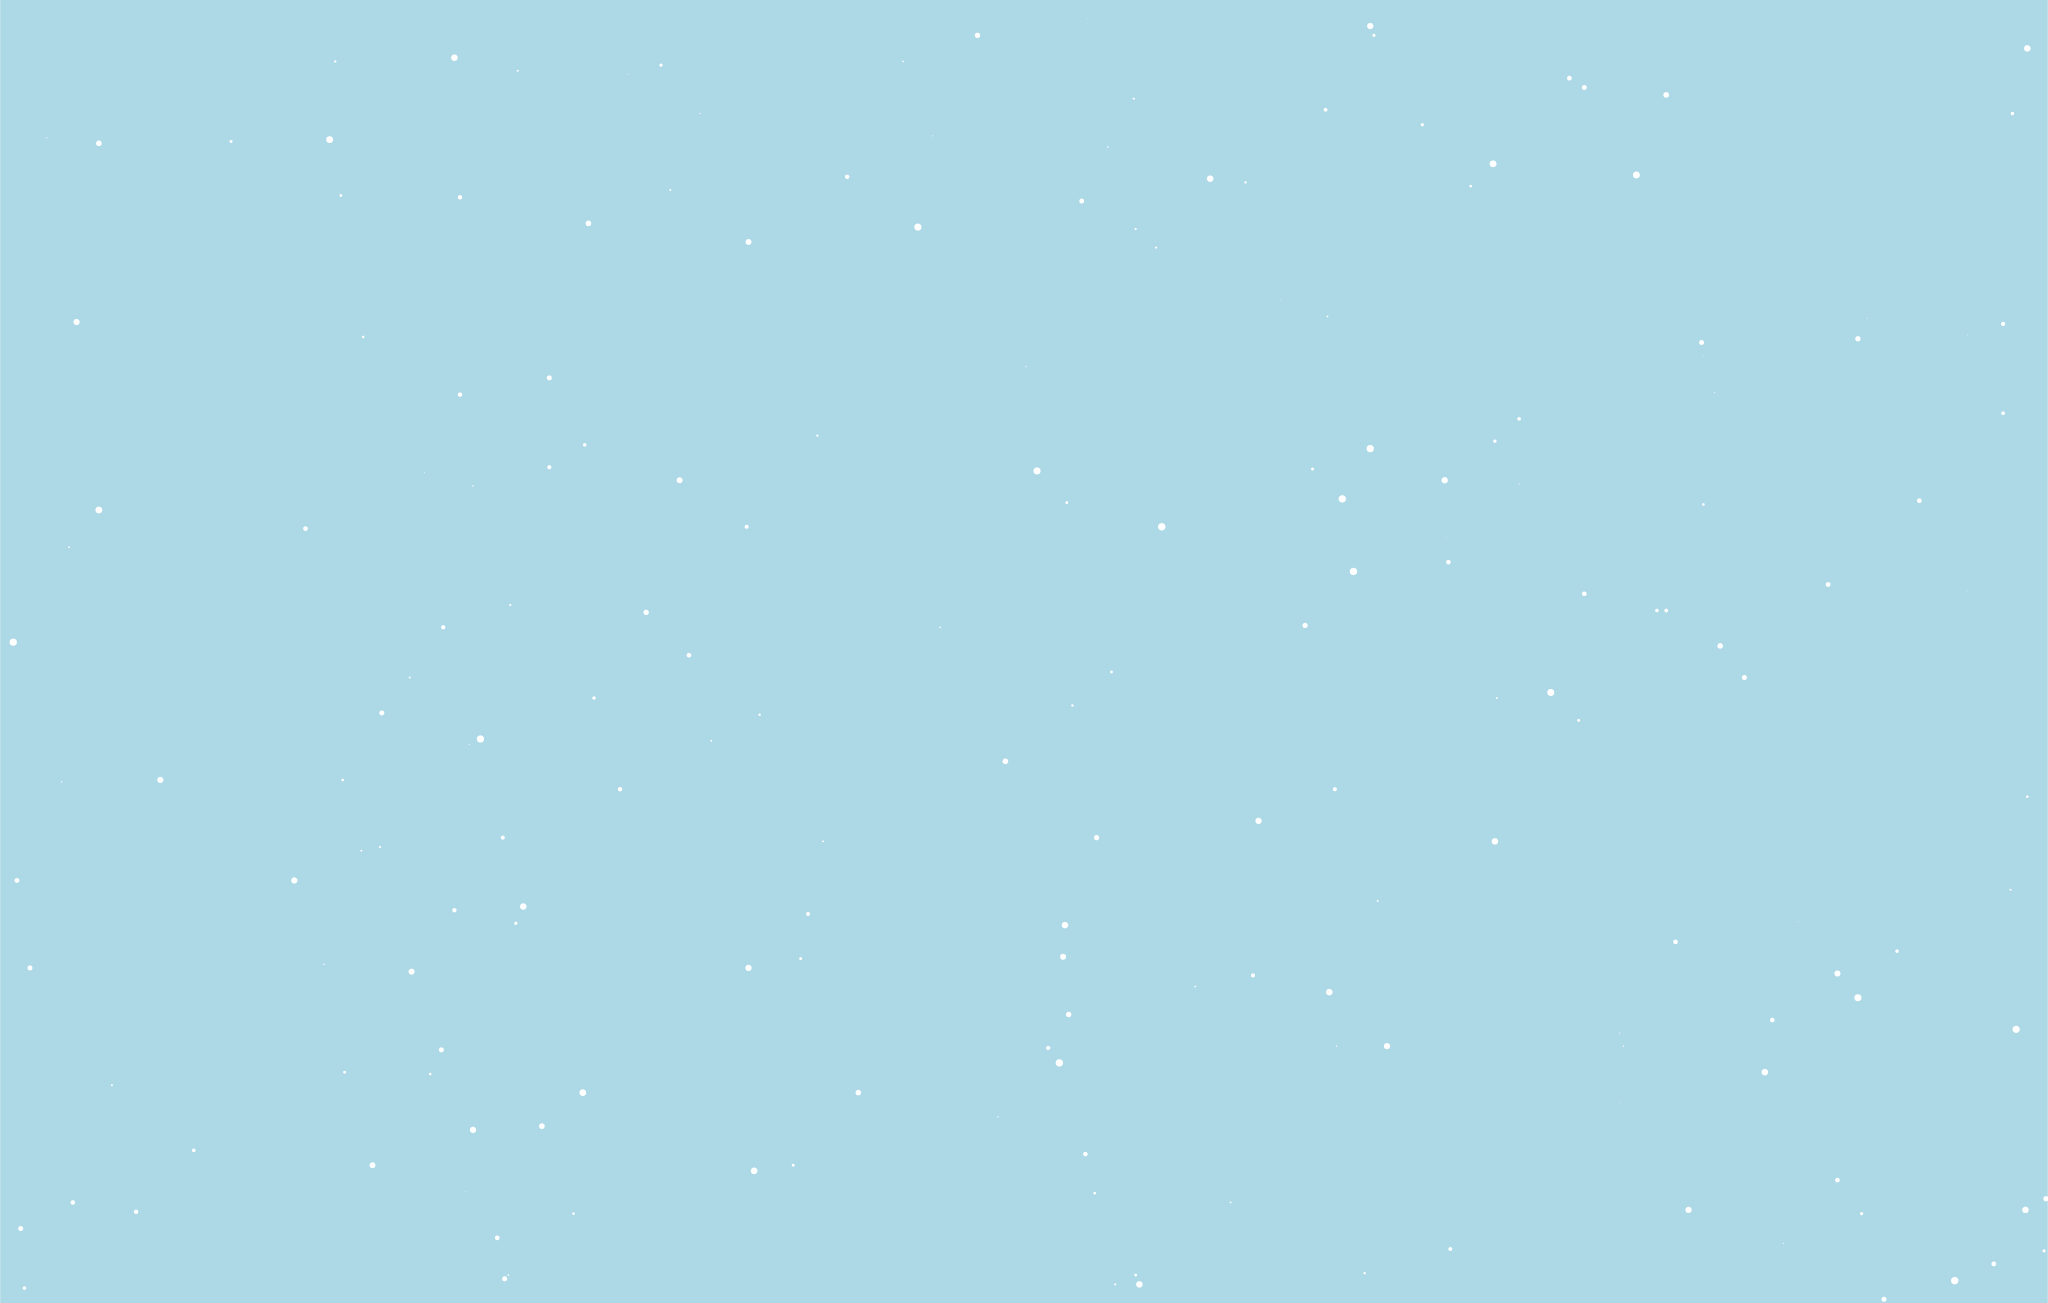

In [9]:
def add_stars():
    # Ajout de 200 étoiles
    for _ in range(200):
        x = random.randint(0, WIDTH)
        y = random.randint(0, HEIGHT)
        size = random.uniform(0.1, 2)  # Taille aléatoire pour chaque étoile
        star = draw.Circle(x, y, size, fill='white')
        time = random.uniform(0.7, 4)  # Durée de l'animation d'opacité
        star_group = draw.Group()
        star_group.append(star)
        # Animation de l'opacité
        star_group.append(draw.Animate(attributeName="opacity", from_or_values="1", to="0", dur=time, repeatCount="indefinite", keyTimes="0;0.5;1", values="1;0;1"))
        d.append(star_group)

add_stars()

# Sauvegarde de l'image
d.set_pixel_scale(2)
d.save_svg('step_2.svg')
SVG('step_2.svg')


## **3. Ajouter L'image du Bonhomme du handball**

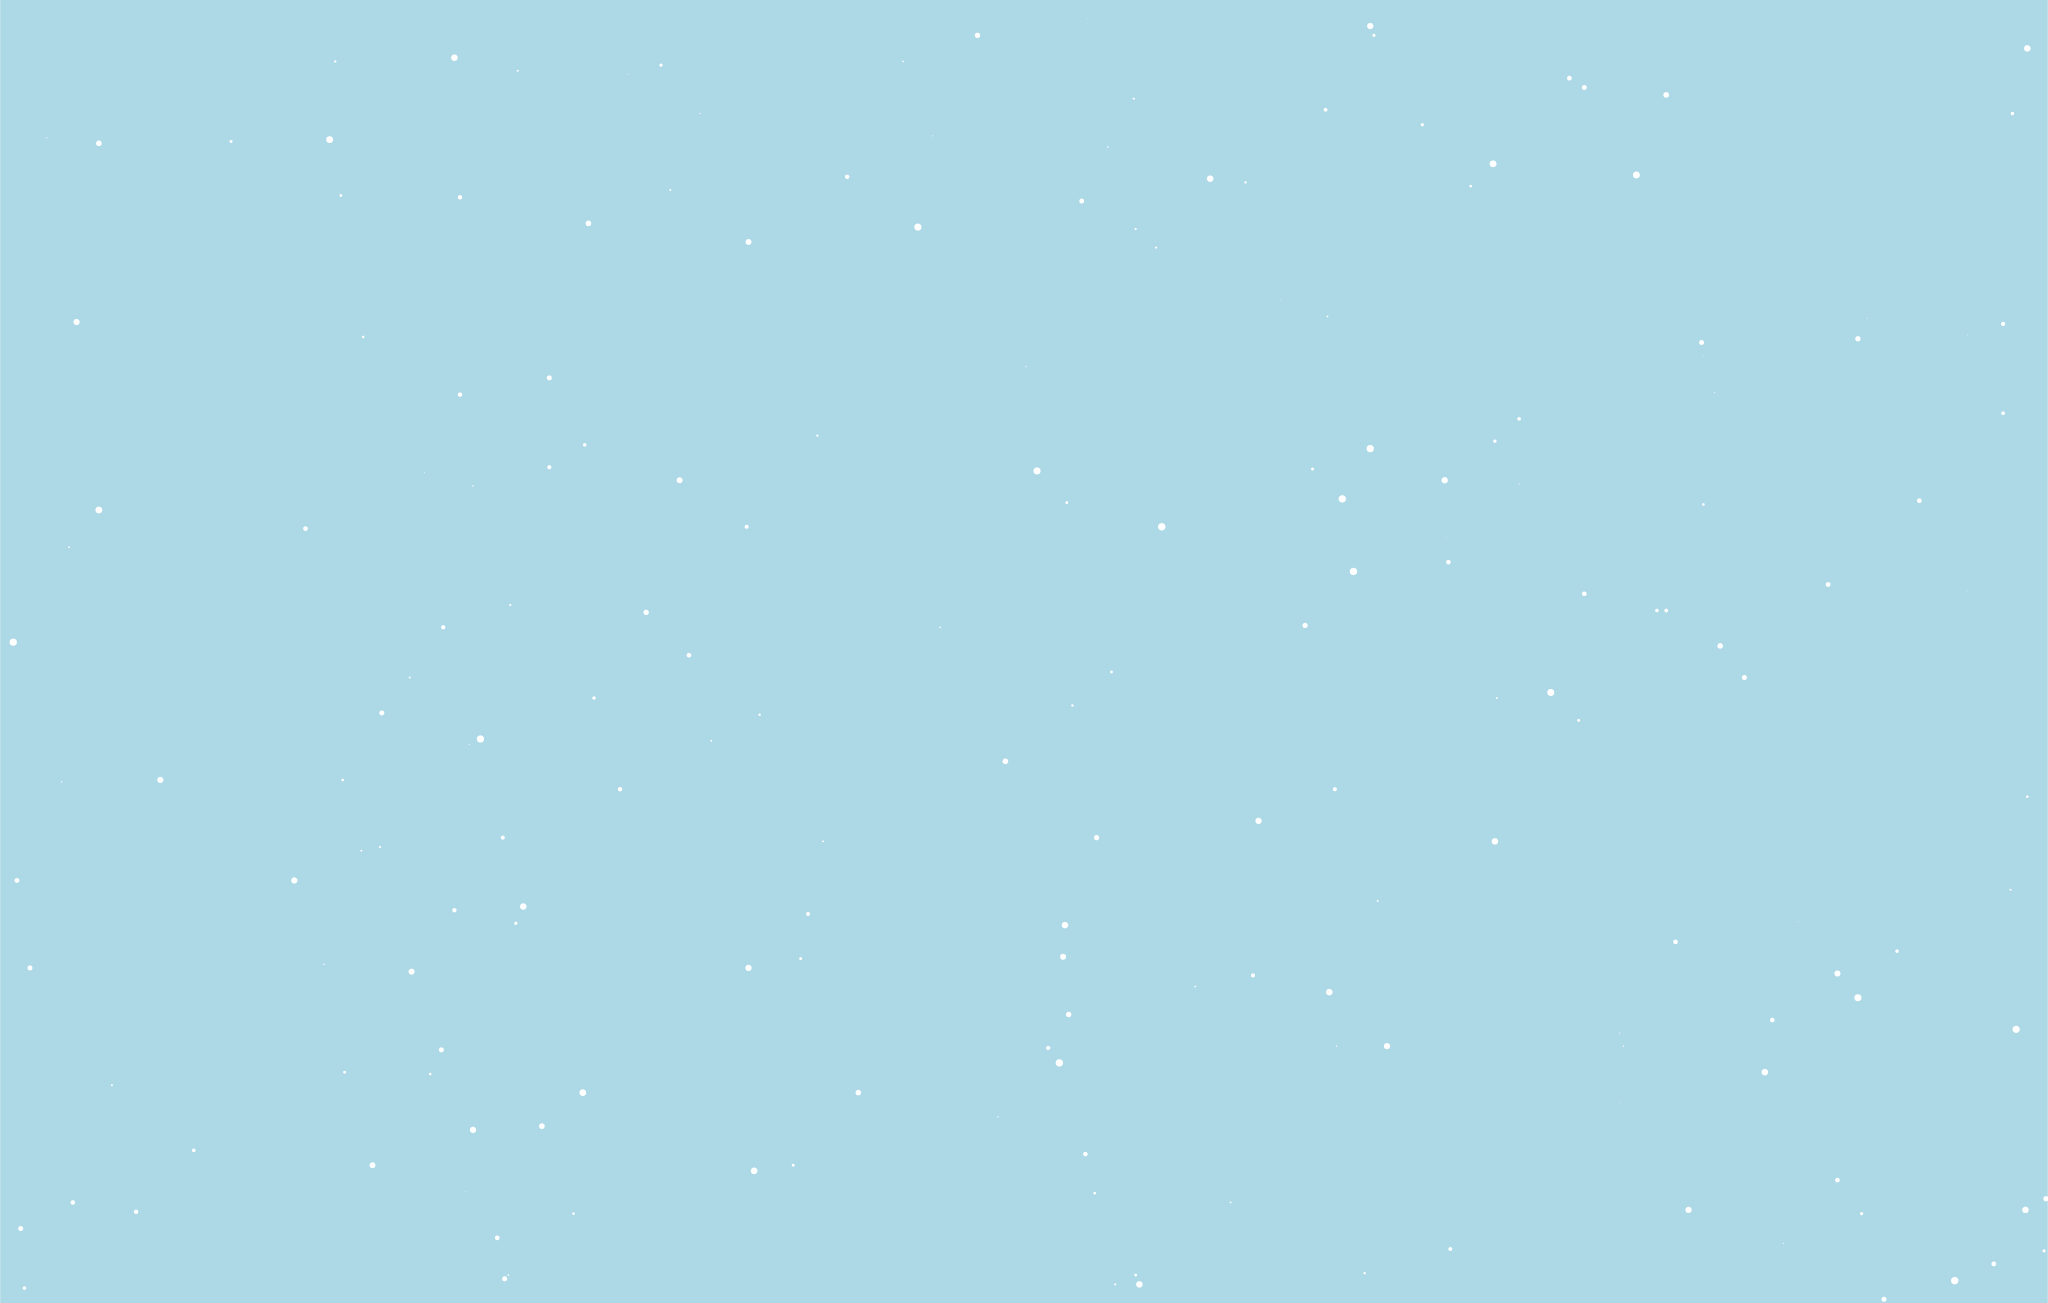

In [12]:
draw.Drawing.raster = True  # Enable rasterization for images

def add_center_image():
    center_x = WIDTH / 2
    center_y = HEIGHT / 2
    # URL de l'image à afficher
    center_image_path = "https://freepngimg.com/save/29984-handball/2480x2480"
    # center_image_path = "bonhomme-handball.png"

    # Ajout de l'image avec opacité
    image = draw.Image(center_x - 300, center_y - 300, 600, 600, path=center_image_path, opacity=0.5)
    d.append(image)

add_center_image()

# Sauvegarde de l'image
d.set_pixel_scale(2)
d.save_svg('step_3.svg')
SVG('step_3.svg')


## **4. Ajouter le filet de la cage**

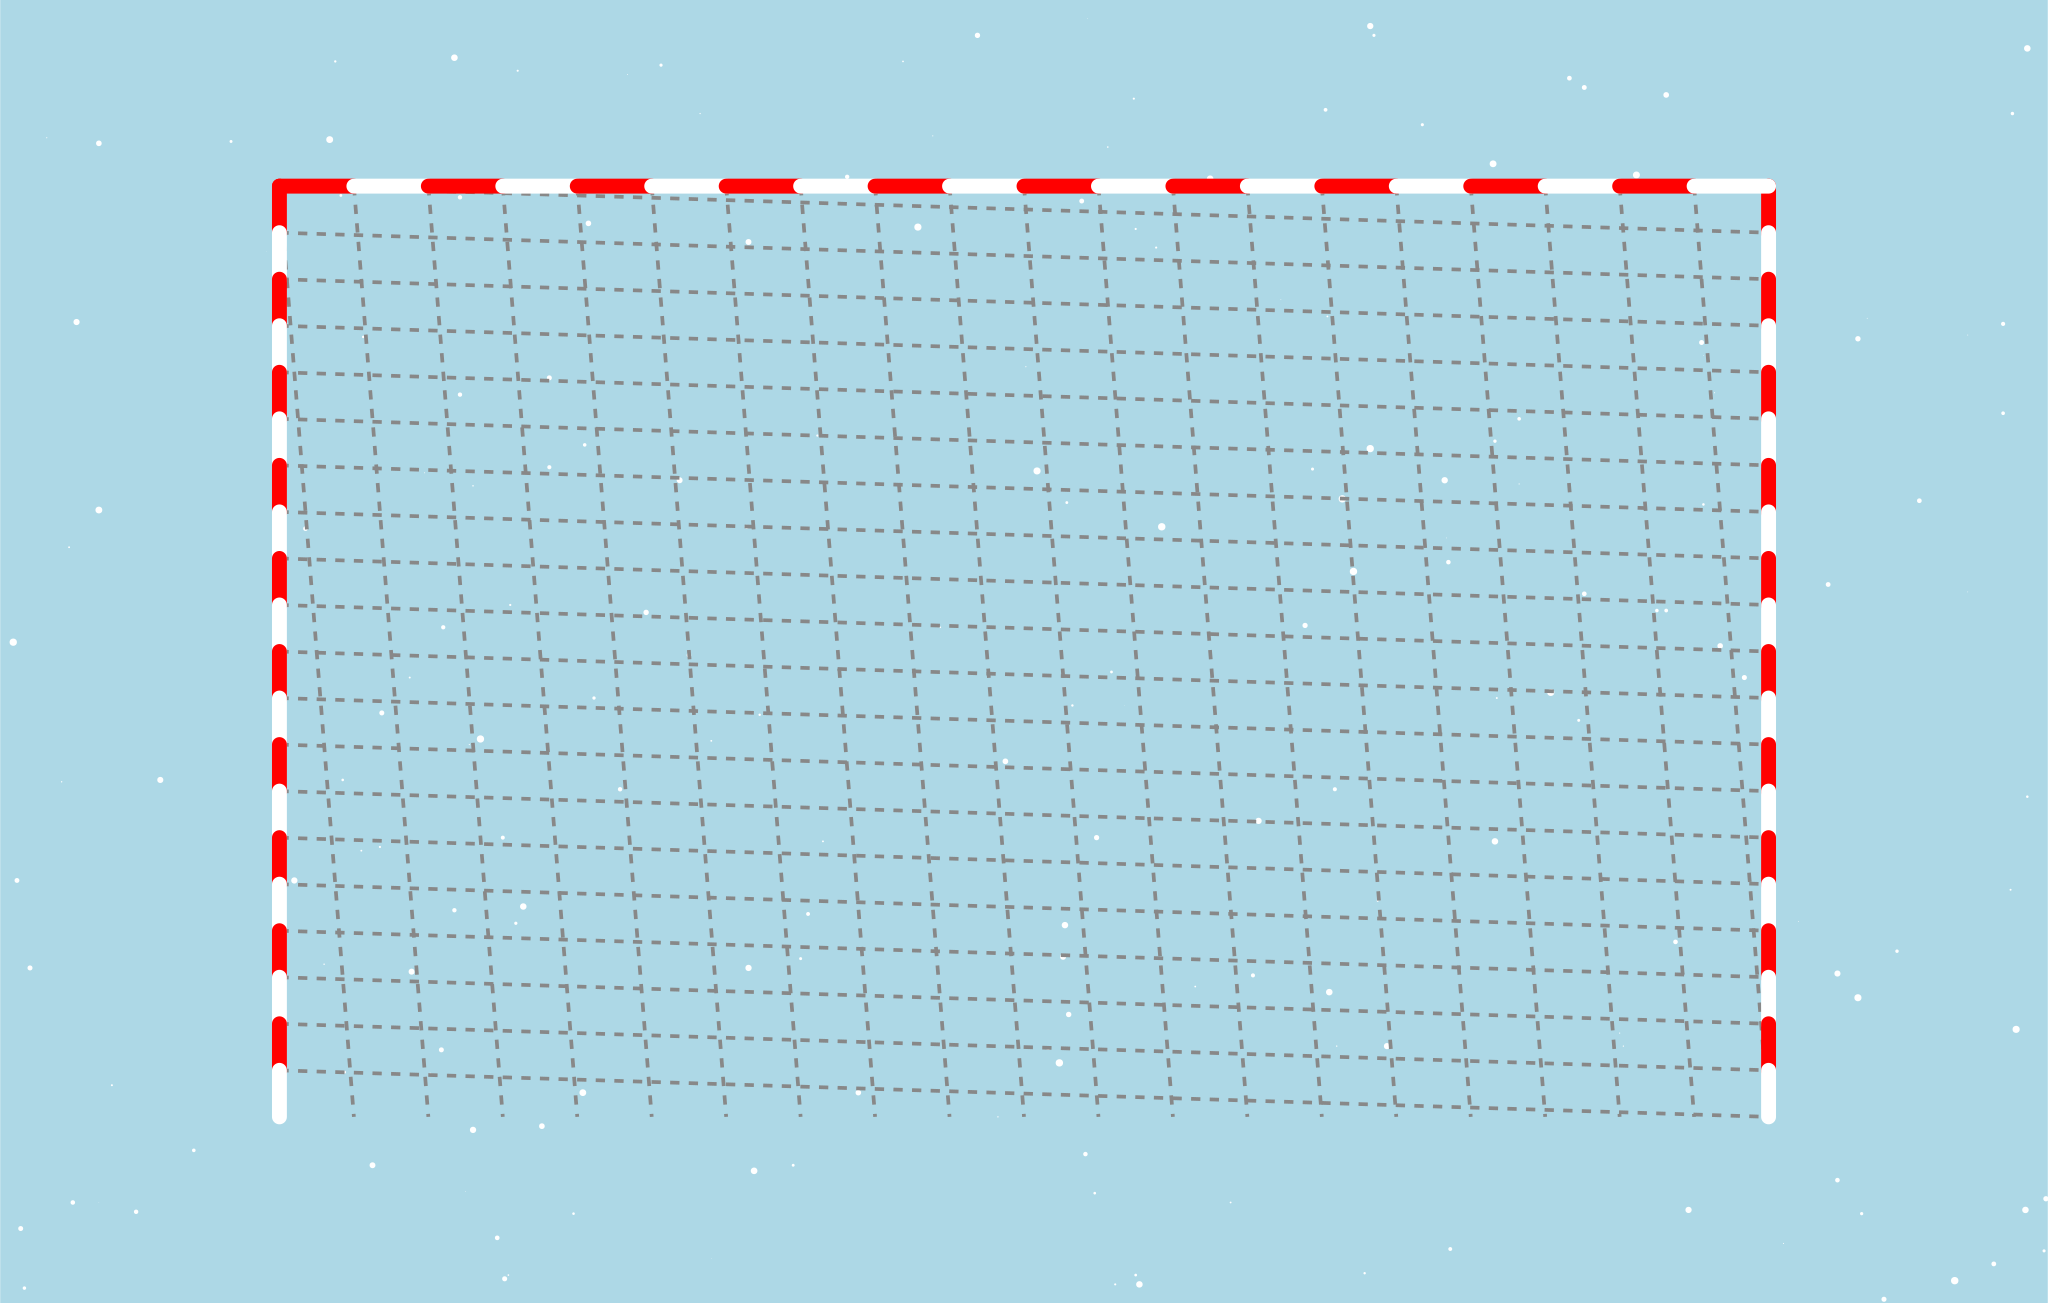

In [13]:
def add_goal_net():
    # Dimensions de la cage
    dim_cage = {'width': 800, 'height': 500, 'x_offset': (WIDTH - 800) / 2, 'y_offset': (HEIGHT - 500) / 2}

    # Lignes horizontales et verticales pour le filet
    for i in range(20):
        d.append(draw.Line(dim_cage['x_offset'] + i * (dim_cage['width'] / 20), dim_cage['y_offset'], dim_cage['x_offset'] + (i + 1) * (dim_cage['width'] / 20), dim_cage['y_offset'] + dim_cage['height'], stroke='#888888', stroke_width=2, stroke_dasharray="5,5"))
        d.append(draw.Line(dim_cage['x_offset'], dim_cage['y_offset'] + i * (dim_cage['height'] / 20), dim_cage['x_offset'] + dim_cage['width'], dim_cage['y_offset'] + (i + 1) * (dim_cage['height'] / 20), stroke='#888888', stroke_width=2, stroke_dasharray="5,5"))

    # Lignes colorées
    for i in range(20):
        stroke_color = 'red' if i % 2 == 0 else 'white'  # Alternance des couleurs
        # Lignes de la cage
        d.append(draw.Line(dim_cage['x_offset'] + i * (dim_cage['width'] / 20), dim_cage['y_offset'], dim_cage['x_offset'] + (i + 1) * (dim_cage['width'] / 20), dim_cage['y_offset'], stroke=stroke_color, stroke_width=8, stroke_linecap='round'))
        d.append(draw.Line(dim_cage['x_offset'], dim_cage['y_offset'] + i * (dim_cage['height'] / 20), dim_cage['x_offset'], dim_cage['y_offset'] + (i + 1) * (dim_cage['height'] / 20), stroke=stroke_color, stroke_width=8, stroke_linecap='round'))
        d.append(draw.Line(dim_cage['x_offset'] + dim_cage['width'], dim_cage['y_offset'] + i * (dim_cage['height'] / 20), dim_cage['x_offset'] + dim_cage['width'], dim_cage['y_offset'] + (i + 1) * (dim_cage['height'] / 20), stroke=stroke_color, stroke_width=8, stroke_linecap='round'))

add_goal_net()

# Sauvegarde de l'image
d.set_pixel_scale(2)
d.save_svg('step_4.svg')
SVG('step_4.svg')


## **5. Ajouter des drapeaux animés autour de la cage**

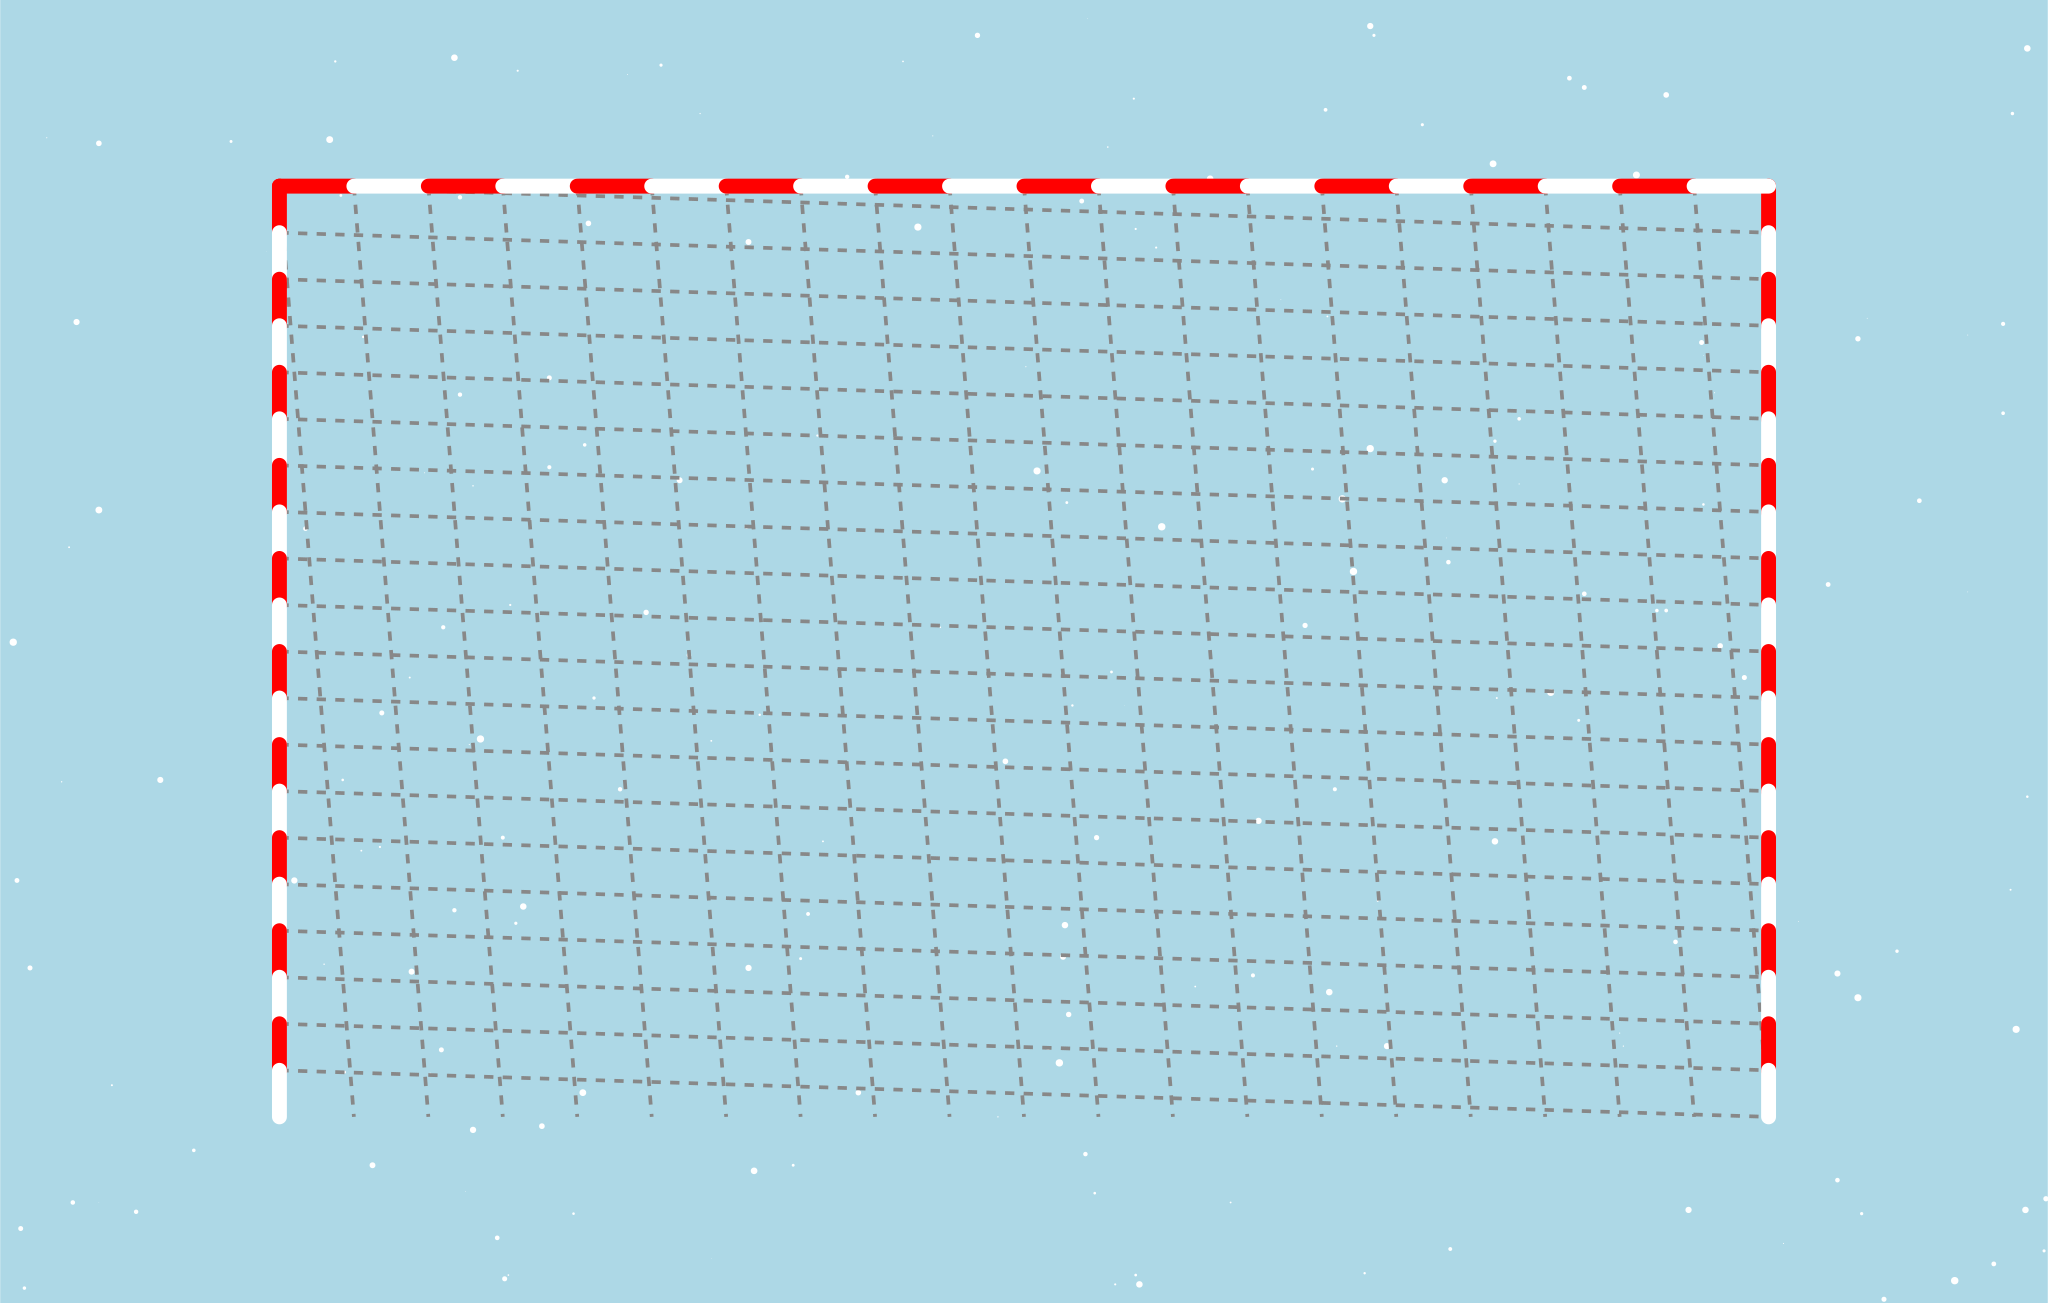

In [14]:
def add_flag_rotation():
    flags = [
        "https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Flag_of_Italy.svg/2560px-Flag_of_Italy.svg.png",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Tunisia.svg/1280px-Flag_of_Tunisia.svg.png",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Denmark.svg/1016px-1016px-Flag_of_Denmark.svg.png",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/1280px-Flag_of_Algeria.svg.png",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/2560px-Flag_of_France.svg.png",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Flag_of_Austria.svg/1200px-Flag_of_Austria.svg.png",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Qatar.svg/1200px-Flag_of_Qatar.svg.png",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Flag_of_Kuwait.svg/2560px-Flag_of_Kuwait.svg.png"
    ]

    # flags = [
    #     "Drapeaux/Flag_of_Italy.svg",
    #     "Drapeaux/Flag_of_Tunisia.svg",
    #     "Drapeaux/Flag_of_Denmark.svg",
    #     "Drapeaux/Flag_of_Algeria.svg",
    #     "Drapeaux/Flag_of_France.svg",
    #     "Drapeaux/Flag_of_Austria.svg",
    #     "Drapeaux/Flag_of_Qatar.svg",
    #     "Drapeaux/Flag_of_Kuwait.svg"
    #     ]
    center_x = WIDTH / 2
    center_y = HEIGHT / 2
    radius = 150
    # Ajout de chaque drapeau en rotation autour de la cage
    for i, flag in enumerate(flags):
        angle_deg = 360 / len(flags) * i
        angle_rad = angle_deg * pi / 180
        flag_x = center_x + radius * cos(angle_rad) - 50
        flag_y = center_y + radius * sin(angle_rad) - 50
        group = draw.Group(transform=f"rotate({angle_deg} {center_x} {center_y})")
        sub_group = draw.Group(transform=f"rotate({-angle_deg} {flag_x + 50} {flag_y + 50})")
        clip_path = draw.ClipPath(id=f"clip-{i}")
        clip_path.append(draw.Circle(flag_x + 50, flag_y + 50, 50))  # Découpe du drapeau en cercle
        d.append(clip_path)
        image = draw.Image(flag_x, flag_y, 100, 100, path=flag, clip_path=f"url(#clip-{i})")
        sub_group.append(image)
        group.append(sub_group)
        group.append(draw.AnimateTransform(attributeName="transform", type="rotate", from_or_values=f"0 {center_x} {center_y}", to=f"360 {center_x} {center_y}", dur="10s", repeatCount="indefinite"))
        d.append(group)

add_flag_rotation()

# Sauvegarde de l'image
d.set_pixel_scale(2)
d.save_svg('step_5.svg')
SVG('step_5.svg')


## **6. Ajouter Le Logo de La coupe du Monde de Handball 2025**

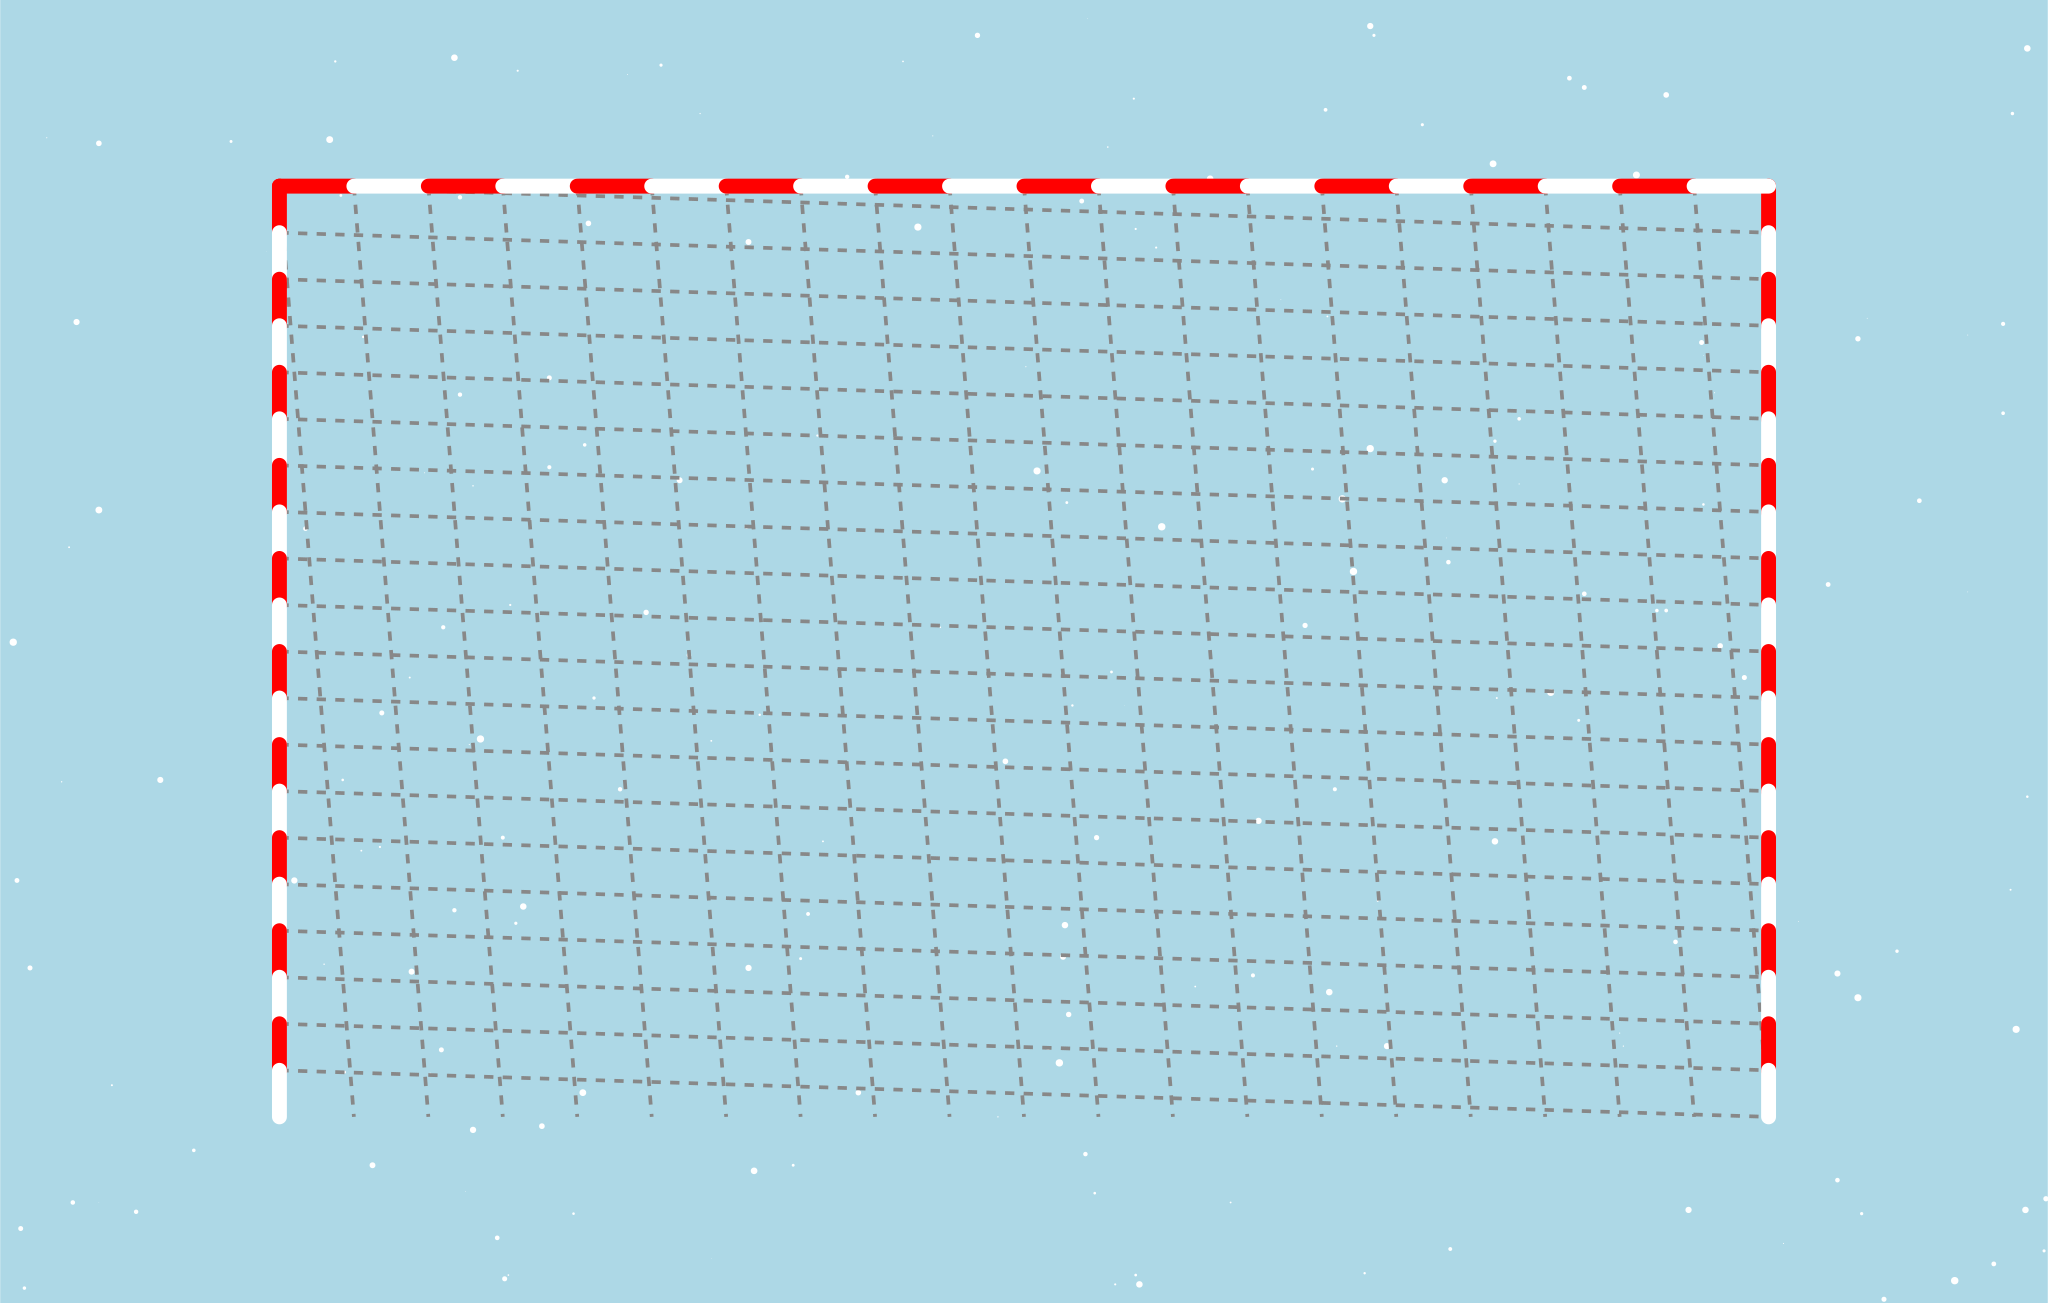

In [15]:
def add_center_image():
    center_x = WIDTH / 2
    center_y = HEIGHT / 2
    center_image_path = "https://images.bfmtv.com/yGK_i9cM5vb24uH1u7_mn_-kZBE=/0x0:0x0/400x0/site_manager_images/noeud/rmcsport/1731107883391_2025_world_championship_png_championnats_du_monde_1731107891743.png"
    # center_image_path = "/2025_world_championship_png_championnats_du_monde.png"

    # Ajouter l'image à la scène
    image = draw.Image(center_x - 60, center_y - 60, 120, 120, path=center_image_path)
    d.append(image)

    d.append(draw.AnimateTransform(
        attributeName="transform",
        type="scale",
        from_or_values="1 1",  # Taille initiale
        to="1.005 1.005",        # Taille légèrement agrandie
        dur="4s",              # Durée de l'animation
        repeatCount="indefinite",  # Répétition indéfinie
        keyTimes="0;0.5;1",        # Animation à trois étapes (début, milieu, fin)
        values="1 1;1.05 1.05;1 1"  # Valeurs d'agrandissement et de rétrécissement
    ))


add_center_image()

# Sauvegarder et afficher le SVG final
d.set_pixel_scale(2)
d.save_svg('final_animated_svg.svg')
SVG('final_animated_svg.svg')
